In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
import FinanceDataReader as fdr
samsung = fdr.DataReader('005930')

- Open: 시가
- High: 고가
- Low: 저가
- Close: 종가
- Volume: 거래량
- Change: 대비

In [6]:
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-09-25,3879,4110,3840,4090,1319773,NaN
2000-09-26,3900,4040,3900,4000,1168610,-0.022005
2000-09-27,4000,4100,3959,4030,1395909,0.007500
2000-09-28,4100,4190,4030,4060,1049400,0.007444
2000-09-29,4120,4120,3940,4040,1150741,-0.004926


In [7]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-01-08,54800,57500,54700,57300,26593553,0.034296
2025-01-09,57600,57700,56100,56100,24490592,-0.020942
2025-01-10,56100,56500,55200,55300,16059223,-0.014260
2025-01-13,54600,55000,54100,54100,16868600,-0.021700
2025-01-14,54200,54600,53900,54000,6219363,-0.001848


In [9]:
# 미국주식도 가져올수 있다

apple = fdr.DataReader('AAPL')

apple.tail()

,Open,High,Low,Close,Volume,Adj Close
2025-01-06,244.309998,247.330002,243.199997,245.000000,45045600,245.000000
2025-01-07,242.979996,245.550003,241.350006,242.210007,40856000,242.210007
2025-01-08,241.919998,243.710007,240.050003,242.699997,37628900,242.699997
2025-01-10,240.009995,240.160004,233.000000,236.850006,61679400,236.850006
2025-01-13,233.500000,234.669998,229.720001,234.399994,49056366,234.399994


In [11]:
## 비트코인 

btc = fdr.DataReader('BTC/KRW', exchange='Bithumb')



'data_source' and 'exchange' argument deprecated, use in symbol like these:
  fdr.DataReader('FRED:DEXKOUS', '1990-01-01')
  fdr.DataReader('FRED:DEXKOUS')
  fdr.DataReader('FRED:NASDAQCOM,M2,HSN1F')
  
  fdr.DataReader('TSE:9984', '2020-01-01')
  fdr.DataReader('NYSE:CBOE', '1990-01-01')
  fdr.DataReader('SSE:000150', '1990-01-01')



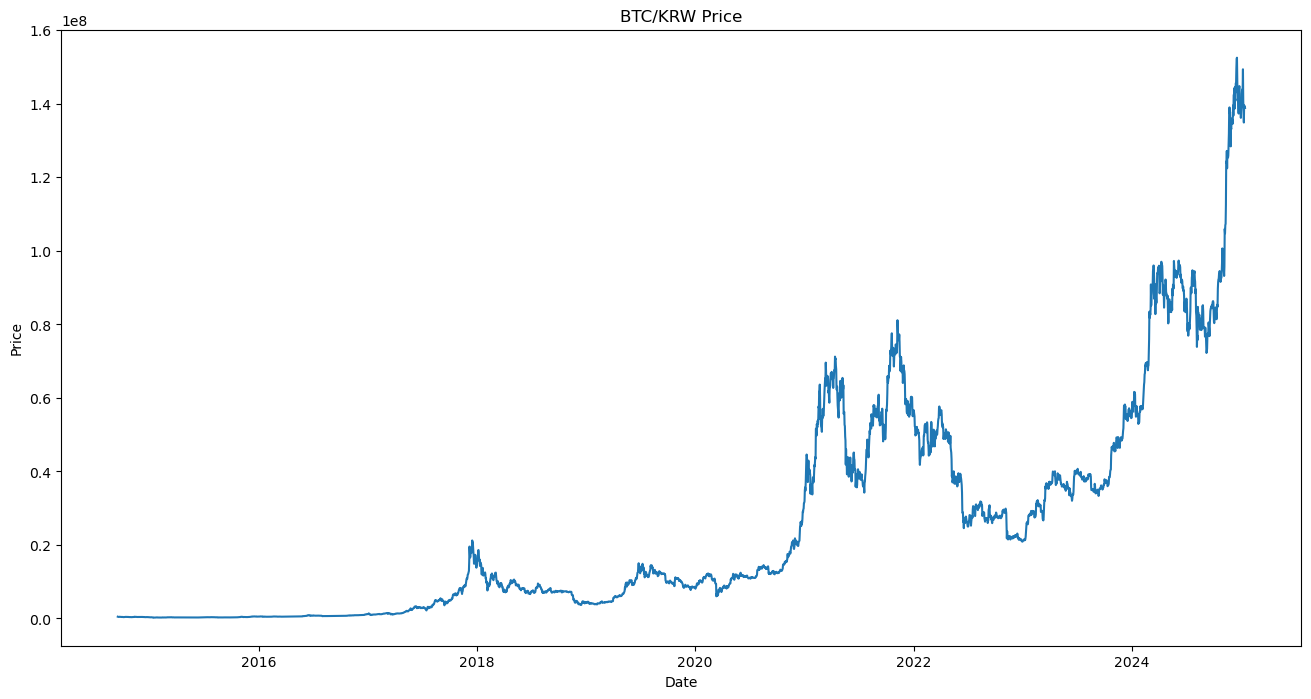

In [13]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=btc.index, y=btc['Close'], data=btc)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC/KRW Price')
plt.show()

## 주가데이터 가져오기

In [14]:
STOCK_CODE = '005930'

In [15]:
stock = fdr.DataReader(STOCK_CODE)

In [16]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-09-25,3879,4110,3840,4090,1319773,NaN
2000-09-26,3900,4040,3900,4000,1168610,-0.022005
2000-09-27,4000,4100,3959,4030,1395909,0.007500
2000-09-28,4100,4190,4030,4060,1049400,0.007444
2000-09-29,4120,4120,3940,4040,1150741,-0.004926


In [17]:
stock.index

DatetimeIndex(['2000-09-25', '2000-09-26', '2000-09-27', '2000-09-28',
               '2000-09-29', '2000-10-02', '2000-10-04', '2000-10-05',
               '2000-10-06', '2000-10-09',
               ...
               '2024-12-30', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

## 시각화

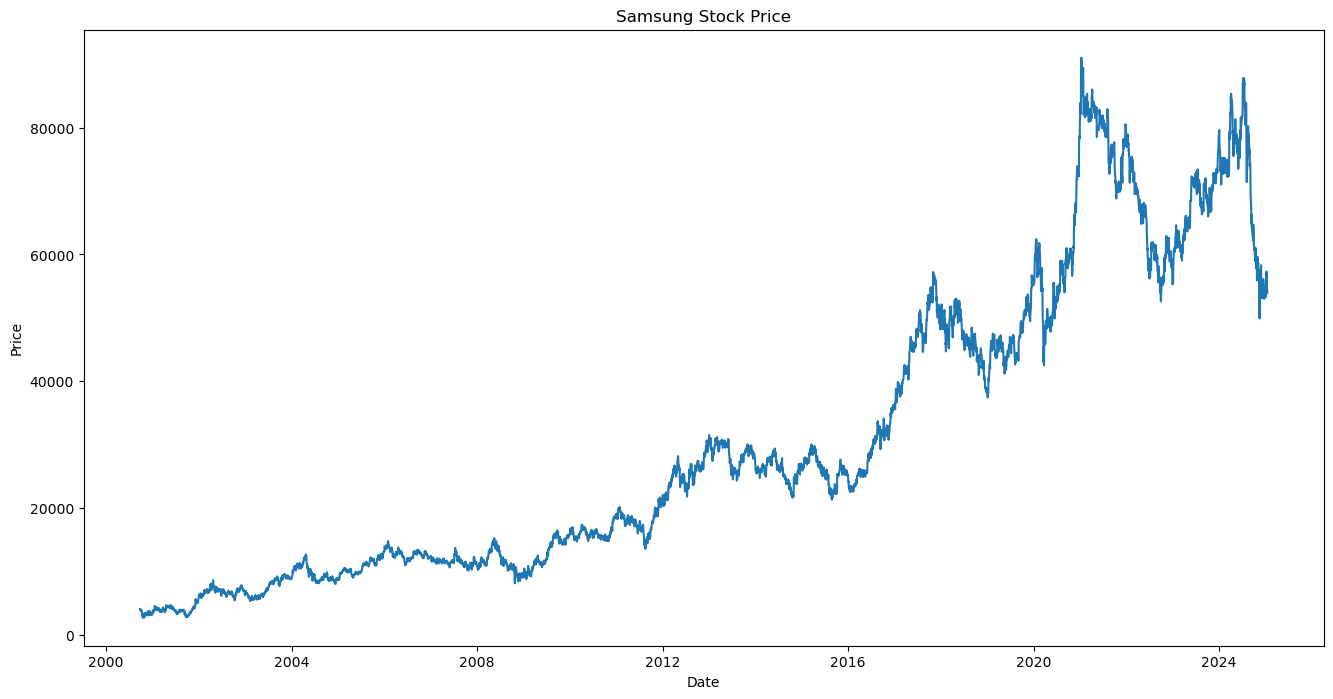

In [18]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=stock.index, y=stock['Close'], data=stock)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Samsung Stock Price')
plt.show()

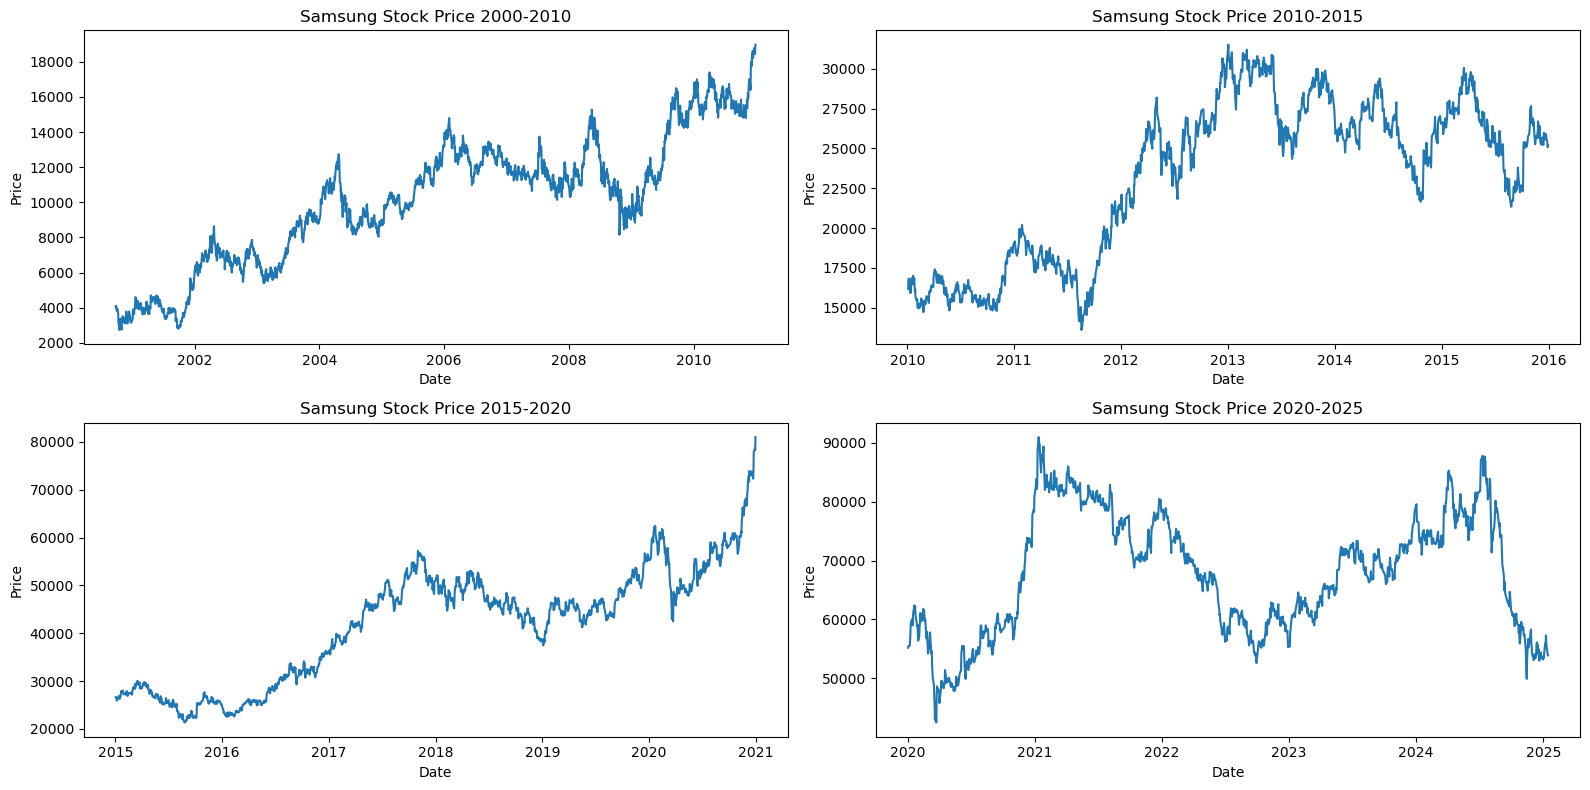

In [19]:
time_step = [['2000', '2010'],
             ['2010', '2015'],
             ['2015', '2020'],
             ['2020', '2025']]

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for i in range(4):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    df = stock.loc[time_step[i][0]:time_step[i][1]]
    sns.lineplot(x=df.index, y=df['Close'], data=df, ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'Samsung Stock Price {time_step[i][0]}-{time_step[i][1]}')
plt.tight_layout()
plt.show()

## Prophet

- 반드시 y컬럼과 ds컬럼이 존재해야한다.
- 예측 값은 y, 시계열 데이터는 ds에 저장한다.

In [25]:
from prophet.plot import plot_plotly, plot_components_plotly

In [20]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2000-09-25,3879,4110,3840,4090,1319773,NaN,4090,2000-09-25
2000-09-26,3900,4040,3900,4000,1168610,-0.022005,4000,2000-09-26
2000-09-27,4000,4100,3959,4030,1395909,0.007500,4030,2000-09-27
2000-09-28,4100,4190,4030,4060,1049400,0.007444,4060,2000-09-28
2000-09-29,4120,4120,3940,4040,1150741,-0.004926,4040,2000-09-29


In [21]:
m = Prophet()
m.fit(stock) # 학습

future = m.make_future_dataframe(periods=30)
future.tail()

10:47:38 - cmdstanpy - INFO - Chain [1] start processing
10:47:45 - cmdstanpy - INFO - Chain [1] done processing


,ds
6025,2025-02-09
6026,2025-02-10
6027,2025-02-11
6028,2025-02-12
6029,2025-02-13


10:48:21 - cmdstanpy - INFO - Chain [1] start processing
10:48:27 - cmdstanpy - INFO - Chain [1] done processing


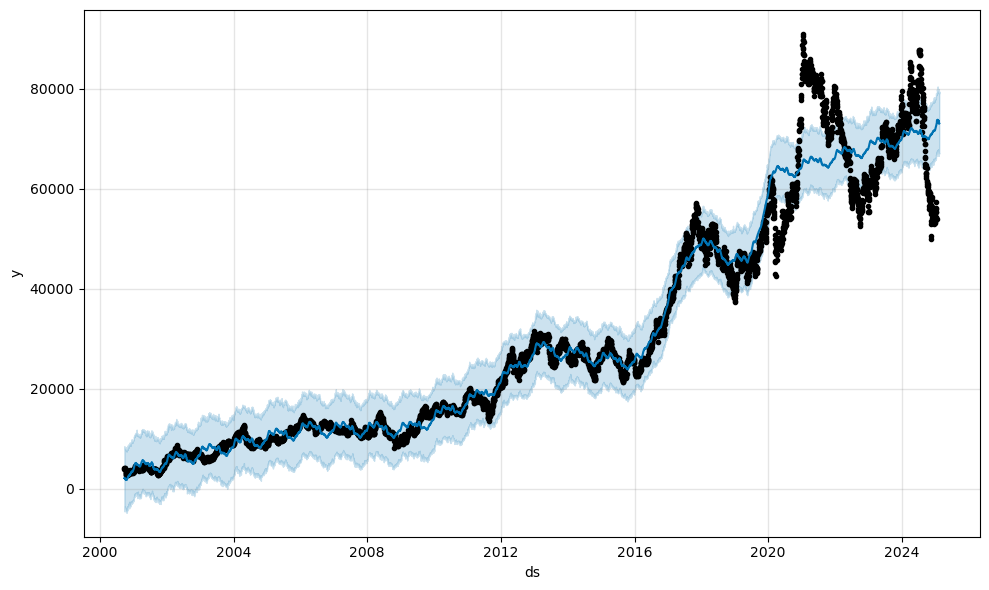

In [22]:
m = Prophet()
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6025,2025-02-09,72368.662849,67095.856941,79471.957173,72368.662849,72368.662849,1187.669789,1187.669789,1187.669789,288.849034,288.849034,288.849034,898.820755,898.820755,898.820755,0.0,0.0,0.0,73556.332638
6026,2025-02-10,72373.846694,67103.758956,79158.979181,72373.846694,72373.846694,719.599681,719.599681,719.599681,-156.792040,-156.792040,-156.792040,876.391721,876.391721,876.391721,0.0,0.0,0.0,73093.446375
6027,2025-02-11,72379.030540,67187.717551,79340.383790,72379.030540,72379.030540,790.397320,790.397320,790.397320,-65.641419,-65.641419,-65.641419,856.038739,856.038739,856.038739,0.0,0.0,0.0,73169.427860
6028,2025-02-12,72384.214385,67041.977089,79084.037133,72384.214385,72384.214385,739.364776,739.364776,739.364776,-98.349398,-98.349398,-98.349398,837.714174,837.714174,837.714174,0.0,0.0,0.0,73123.579161
6029,2025-02-13,72389.398230,67302.011829,79493.739233,72389.398230,72389.398230,718.077755,718.077755,718.077755,-103.207832,-103.207832,-103.207832,821.285587,821.285587,821.285587,0.0,0.0,0.0,73107.475985


In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6025,2025-02-09,73556.332638,67095.856941,79471.957173
6026,2025-02-10,73093.446375,67103.758956,79158.979181
6027,2025-02-11,73169.427860,67187.717551,79340.383790
6028,2025-02-12,73123.579161,67041.977089,79084.037133
6029,2025-02-13,73107.475985,67302.011829,79493.739233


### plotly 활용

In [26]:
fig = plot_plotly(m, forecast)
fig

In [27]:
plot_components_plotly(m, forecast)

### change points

In [28]:
from prophet.plot import add_changepoints_to_plot

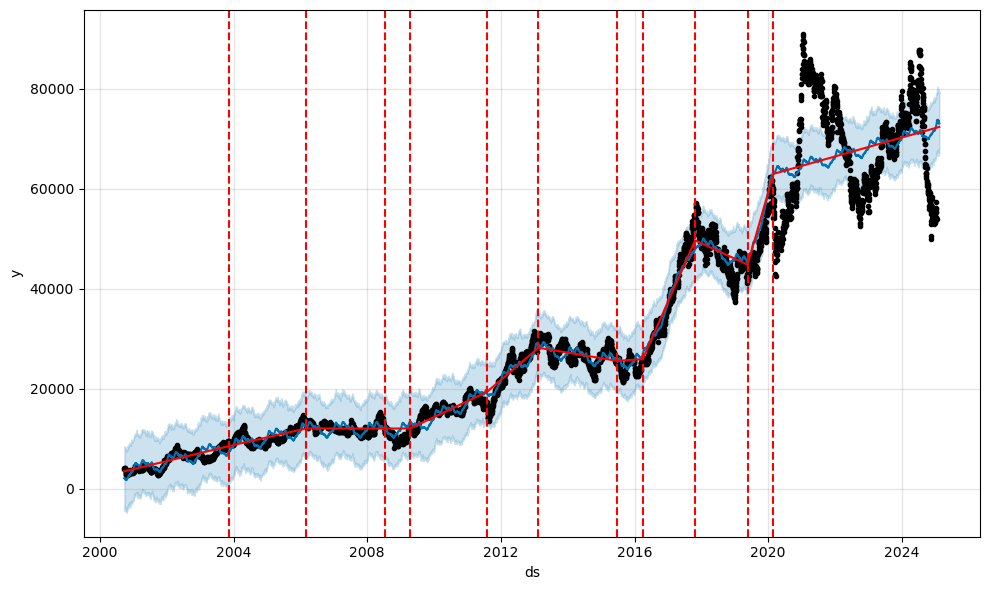

In [29]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### flexibility 조절

11:00:51 - cmdstanpy - INFO - Chain [1] start processing
11:00:58 - cmdstanpy - INFO - Chain [1] done processing


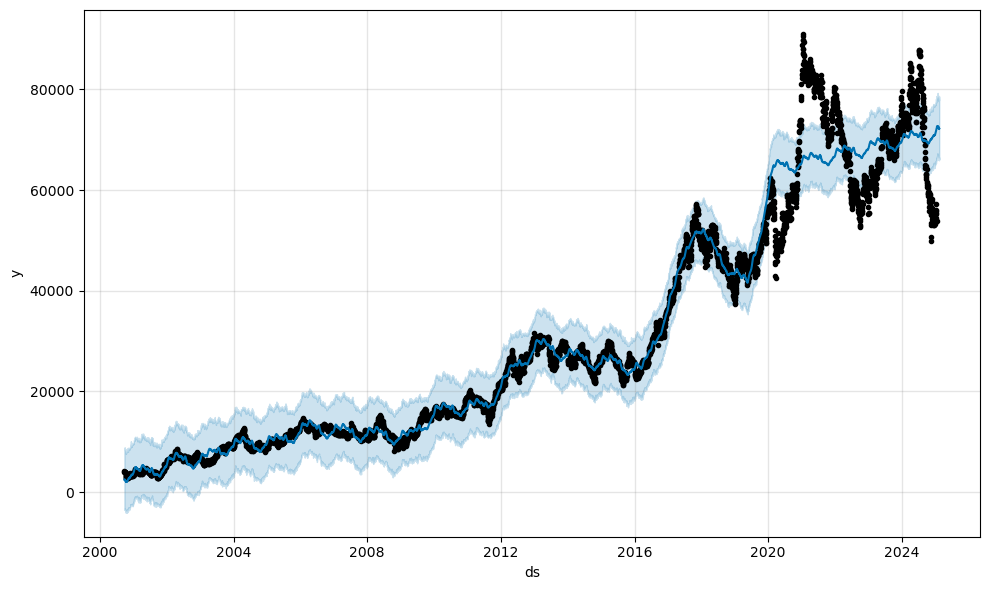

In [31]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

11:01:04 - cmdstanpy - INFO - Chain [1] start processing
11:01:06 - cmdstanpy - INFO - Chain [1] done processing


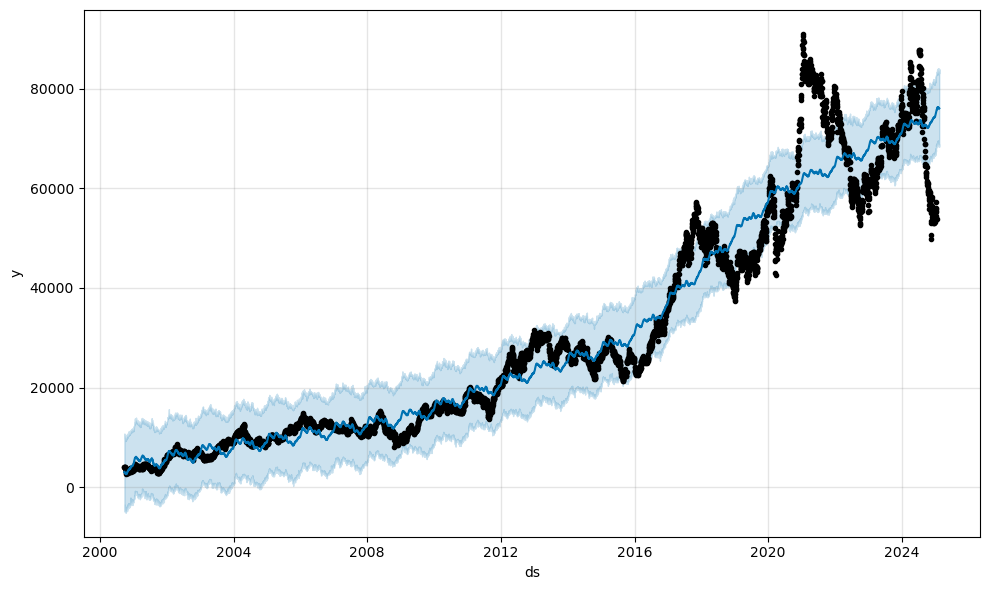

In [32]:
m = Prophet(changepoint_prior_scale=0.01)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)